<a href="https://colab.research.google.com/github/SimplyYasH19/Ride-Sharing-App/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install numpy tensorflow keras pillow


In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)


In [7]:
num_classes = len(set(y_train))

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 147s 310ms/step - accuracy: 0.1412 - loss: 2.2935 - val_accuracy: 0.3994 - val_loss: 2.2218
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 304ms/step - accuracy: 0.2858 - loss: 2.2115 - val_accuracy: 0.5605 - val_loss: 2.1188
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 298ms/step - accuracy: 0.4224 - loss: 2.1099 - val_accuracy: 0.6456 - val_loss: 1.9782
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 308ms/step - accuracy: 0.5069 - loss: 1.9772 - val_accuracy: 0.7044 - val_loss: 1.7889
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 305ms/step - accuracy: 0.5756 - loss: 1.7954 - val_accuracy: 0.7410 - val_loss: 1.5522
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 198s 298ms/step - accuracy: 0.6223 - loss: 1.5796 - val_accuracy: 0.7685 - val_loss: 1.3018
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 297ms/step - accuracy: 0.6589 - loss: 1.3630 - val_accuracy: 0.7947 - val_loss: 1.0820
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 299ms/step - accuracy: 0.6809 -

The model has successfully trained
Saving the model as mnist.h5


In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7019413709640503
Test accuracy: 0.8367999792098999


In [14]:
from PIL import ImageGrab
import numpy as np



📤 Please upload an image of a handwritten digit (PNG/JPG)...


Saving Number 2.png to Number 2 (3).png


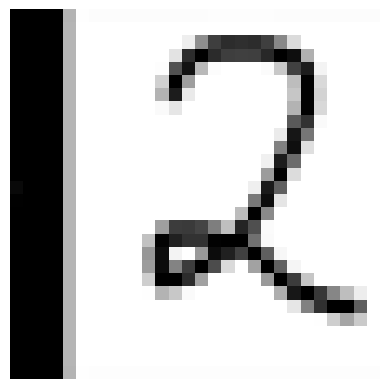

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted Digit: 0 with 61.52% confidence


In [24]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1. Load the trained model
model = load_model('mnist.h5')

# 2. Ask user to upload a digit image
print("📤 Please upload an image of a handwritten digit (PNG/JPG)...")
uploaded = files.upload()

# 3. Process each uploaded image
for filename in uploaded.keys():
    # Load image in grayscale
    img = Image.open(filename).convert("L")
    img = img.resize((28, 28))  # resize to MNIST size

    # # Invert colors (MNIST is white digit on black background)
    # img = ImageOps.invert(img)

    # Show processed image
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

    # Convert to array & normalize
    img_array = np.array(img)
    img_array = img_array.reshape(1, 28, 28, 1)  # add batch & channel dimensions
    img_array = img_array.astype('float32') / 255.0

    # Predict
    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    print(f"Predicted Digit: {predicted_digit} with {confidence:.2f}% confidence")
